In [76]:
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
import spacy
import string
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
nlp = spacy.load("pt_core_news_sm")


In [77]:

def Lematizar(texto):
    
    doc = nlp(texto)


    lemmas = [token.lemma_ for token in doc]


    texto_lematizado = " ".join(lemmas)

    return lemmas


In [78]:

def Stemmer(texto):

    stemmer = RSLPStemmer()

    doc = nlp(texto)


    raiz = [stemmer.stem(token.text) for token in doc]


    texto_stemizado = " ".join(raiz)


    return raiz


In [79]:
# Tokenização (word)
def tokenizar(caminho):

    with open(caminho, 'r', encoding='utf-8') as file:
        texto = file.read()

    palavras = word_tokenize(texto)

    return palavras

# Remoção de pontuações e outros caracteres especiais
def removerPontuacao(palavras):

    result = []

    for palavra in palavras:
        if palavra not in string.punctuation:
            result.append(palavra)

    return result


# Remoção de stopwords
def removerStopWord(palavras, stopwords):

    result = []

    for palavra in palavras:
        if palavra not in stopwords:
            result.append(palavra)

    return result


# Quantidade de types
def Tokens(texto):

    palavras = word_tokenize(texto)

    result = []

    for palavra in palavras:
        if palavra not in string.punctuation:
            result.append(palavra)

    return result


def MaisFrequentes(palavras, n):

    freq = FreqDist(palavras)

    palavras_frequentes = freq.most_common(n)

    return palavras_frequentes


# Ranking dos 20 types mais frequentes no texto
def ranking_20(palavras):

    freq = FreqDist(palavras)

    plt.figure(figsize=(8, 4))
    freq.plot(20, title="Frequência de Palavras")


capivara nome científico hydrochoerus hydrochaeris espécie mamífero roedor família caviidae subfamília hydrochoerinae alguns autores consideram deva ser classificada família própria incluída grupo roedores classificam pacas cutias preás porquinho-da-índia ocorre toda américa sul leste andes habitats associados rios lagos pântanos nível mar 1 300 m altitude extremamente adaptável pode ocorrer ambientes altamente alterados ser humano maior roedor mundo pesando 91 kg medindo 1,2 m comprimento 60 cm altura pelagem densa cor avermelhada marrom escuro possível distinguir machos conta presença glândula proeminente focinho apesar dimorfismo sexual ser aparente existe série adaptações sistema digestório herbivoria principalmente ceco alcança maturidade sexual cerca 1,5 ano idade fêmeas dão luz geralmente quatro filhotes vez pesando 1,5 kg nascem dentição permanente cativeiro pode viver 12 anos idade
[('roedor', 3), ('ser', 3), ('família', 2), ('classificar', 2), ('ocorrer', 2), ('m', 2), ('pode

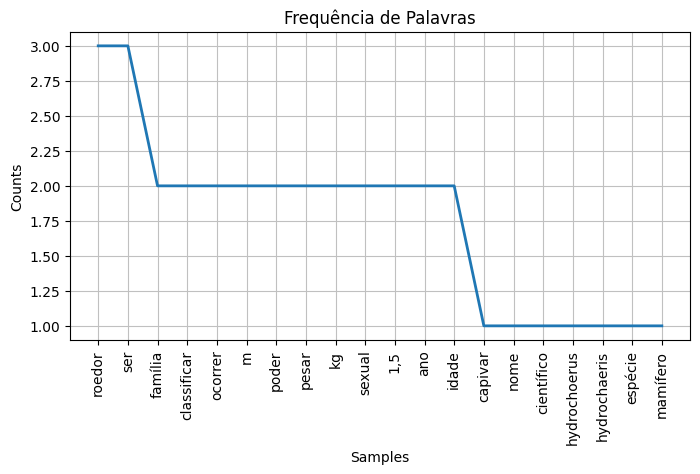

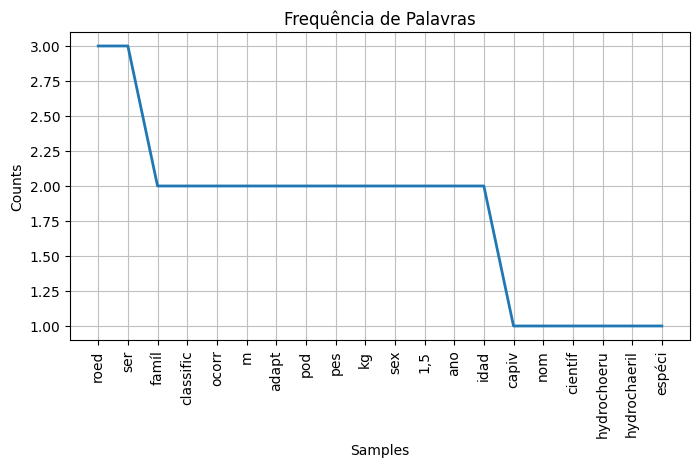

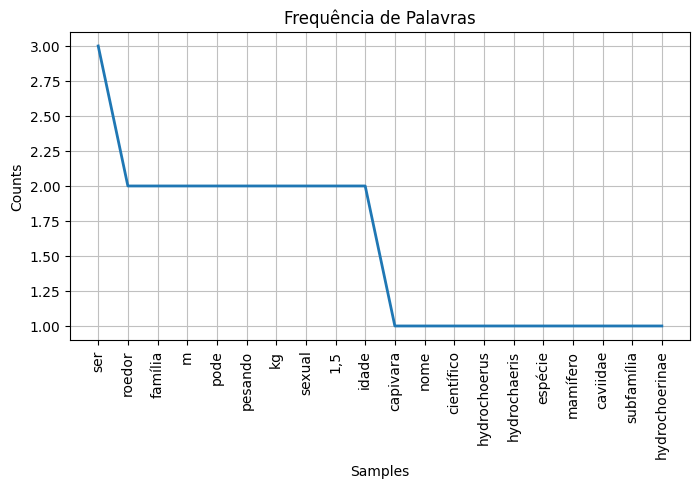

In [80]:
texto = tokenizar("database\capivara-pt.txt")
stopwords= tokenizar("database\stopwords-pt.txt")


texto_pre = removerStopWord(removerPontuacao(texto), stopwords)

texto_pronto = " ".join(texto_pre)

print(texto_pronto)

print(MaisFrequentes(Lematizar(texto_pronto),20))

print(MaisFrequentes(Stemmer(texto_pronto),20))

print(MaisFrequentes(Tokens(texto_pronto),20))


ranking_20(Lematizar(texto_pronto))

ranking_20(Stemmer(texto_pronto))

ranking_20(Tokens(texto_pronto))


